# ETL-PROJECT
## CONVID-19 --- REPUBLIC OF KOREA
### Background
CDC is responding to an outbreak of respiratory disease caused by a novel (new) coronavirus that was first detected in China and which has now been detected in almost 70 locations internationally, including in the United States. The virus has been named “SARS-CoV-2” and the disease it causes has been named “coronavirus disease 2019” (abbreviated “COVID-19”). (1)


In [64]:
# Dependencies and Setup
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import seaborn library to create figure
import seaborn as sns

In [65]:
# This code will suprese the warning on the code
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=RuntimeWarning)

## DATA EXTRACTION
- We used three (3) dataset from the public platform Kaggle.com. All data was based on the country of South Korea. The data extracted ranging from 1/20/2020 to 3/2/2020. The number of cases are 4812. 
- The sources of the dataset are as follows
-   patient.csv ---> Epidemiological data of COVID-19 patients in South Korea
-   route.csv ---> Route data of COVID-19 patients in South Korea (where they had visited)
-   time.csv ---> Time series data of COVID-19 status in South Korea


## Data Format:
- the dataset coming on csv format 
- There are approximately 249 file with dataset and we selected the author that offer data unique for South Korea.
- We extracted the three data documents in csv files


In [66]:
# Bring the data selected from coronavirusdataset from Kaggle website and visualize the extraction

# the path to the csv files
patient_csv = "patient.csv"
route_csv = "route.csv"
time_csv = "time.csv"


## Data preparation
 Created separate data frame to allow us to visualize the columns and content of the files.

In [67]:
# Read the files data and see them
patient_df = pd.read_csv(patient_csv)

route_df =pd.read_csv(route_csv)

time_df = pd.read_csv(time_csv)

In [68]:
# Visualize each dataframe --- patient.csv ---> Epidemiological data of COVID-19 patients in South Korea
patient_df.head()

,patient_id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984,China,filtered at airport,NaN,visit to Wuhan,1,NaN,45,1/20/2020,2/6/2020,NaN,released
1,2,male,1964,Korea,filtered at airport,NaN,visit to Wuhan,1,NaN,75,1/24/2020,2/5/2020,NaN,released
2,3,male,1966,Korea,capital area,NaN,visit to Wuhan,1,NaN,16,1/26/2020,2/12/2020,NaN,released
3,4,male,1964,Korea,capital area,NaN,visit to Wuhan,1,NaN,95,1/27/2020,2/9/2020,NaN,released
4,5,male,1987,Korea,capital area,NaN,visit to Wuhan,1,NaN,31,1/30/2020,3/2/2020,NaN,released


### Definition of patient columns 
- id: the ID of the patient (n-th confirmed patient)
- sex: the sex of the patient
- birth_year: the birth year of the patient
- country: the country of the patient
- region: the region of the patient
- group: the collective infection
- infection_reason: the reason of infection
- infection_order: the order of infection
- infected_by: the ID of who has infected the patient
- contact_number: the number of contacts with people
- confirmed_date: the date of confirmation
- released_date: the date of discharge
- deceased_date: the date of decease
- state: isolated/released/deceased


In [69]:
# Visualize each dataframe --- route.csv ---> Route data of COVID-19 patients in South Korea (where they had visited)
route_df

,patient_id,date,province,city,visit,latitude,longitude,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,1/19/2020,Incheon,Jung-gu,airport,37,126,female,1984,China,filtered at airport,0,visit to Wuhan,1,0,45,1/20/2020,2/6/2020,NaN,released
1,1,1/20/2020,Incheon,Seo-gu,hospital_isolated,37,127,female,1984,China,filtered at airport,0,visit to Wuhan,1,0,45,1/20/2020,2/6/2020,NaN,released
2,2,1/22/2020,Gyeonggi-do,Gimpo-si,airport,38,127,male,1964,Korea,filtered at airport,0,visit to Wuhan,1,0,75,1/24/2020,2/5/2020,NaN,released
3,2,1/23/2020,Seoul,Jung-gu,hospital_isolated,38,127,male,1964,Korea,filtered at airport,0,visit to Wuhan,1,0,75,1/24/2020,2/5/2020,NaN,released
4,3,1/20/2020,Incheon,Jung-gu,airport,37,126,male,1966,Korea,capital area,0,visit to Wuhan,1,0,16,1/26/2020,2/12/2020,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,14,1/30/2020,Gyeonggi-do,Bucheon-si,market,37,127,female,1980,China,capital area,0,contact with patient,3,12,3,2/2/2020,2/18/2020,NaN,released
64,14,2/2/2020,Gyeonggi-do,Seongnam-si,hospital_isolated,37,127,female,1980,China,capital area,0,contact with patient,3,12,3,2/2/2020,2/18/2020,NaN,released
65,15,1/20/2020,Incheon,Jung-gu,airport,37,126,male,1977,Korea,capital area,0,contact with patient,2,4,15,2/2/2020,2/24/2020,NaN,released
66,15,2/1/2020,Gyeonggi-do,Suwon-si,hospital,37,127,male,1977,Korea,capital area,0,contact with patient,2,4,15,2/2/2020,2/24/2020,NaN,released


### Definitions of route.csv columns
- id: the ID of the patient (n-th confirmed patient)
- date: Year-Month-Day
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- visit: the type of place visited
- latitude: WGS84
- longitude: WGS84

In [70]:
# Visualize each dataframe
time_df

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0
5,2020-01-25,27,25,2,0,0,0,0,0,0,0
6,2020-01-26,51,47,3,0,0,24,22,1,0,0
7,2020-01-27,61,56,4,0,0,10,9,1,0,0
8,2020-01-28,116,97,4,0,0,55,41,0,0,0
9,2020-01-29,187,155,4,0,0,71,58,0,0,0


### Definition of time_df columns 
- date: Year-Month-Day
- acc_test: the accumulated number of tests
- acc_negative: the accumulated number of negative results
- acc_confirmed: the accumulated number of positive results
- acc_released: the accumulated number of releases

#### Exploring the data:
- Evaluate dataset to identify variables that are correlated. Use the map to represent the data in a 2-dimensional form and obtain a colored visual.

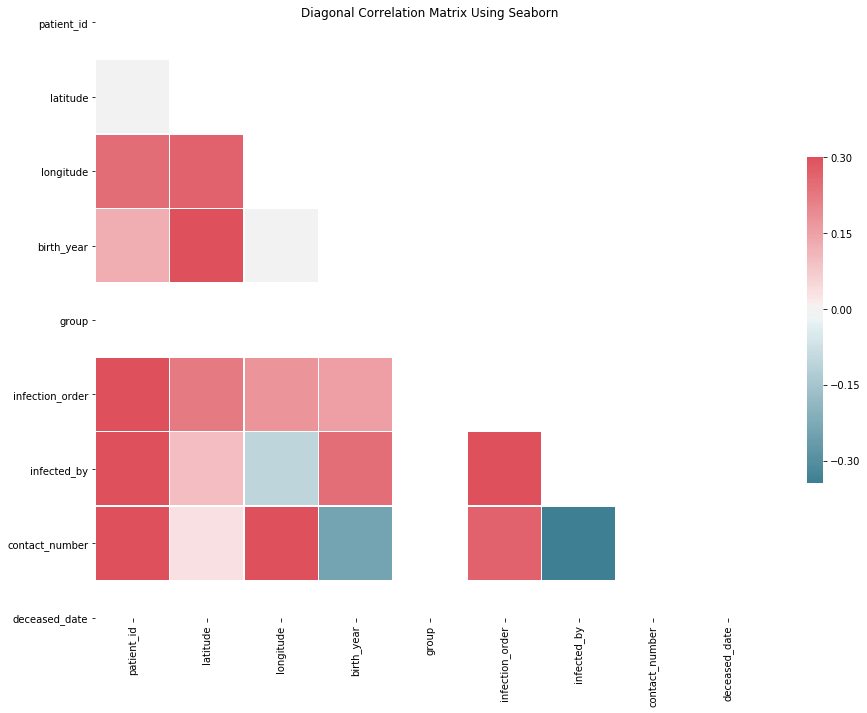

In [71]:
# Create data frame correlation
corr = route_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap='coolwarm'

# Labels
ax.set_title('Diagonal Correlation Matrix Using Seaborn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
).get_figure().savefig('patient_correlation_matrix.png') # Save to a file

plt.show()

In [174]:
#Patient demographic breakdown from the dataset
ptbackground = pd.DataFrame(columns=['#_of_patients_From_Korea','#_of_patients_From_China','Number_of_Male_Patients',
                                    'Number_of_Female_patients','Average_patient_birth_year','Youngest_patient_birth_year',
                                    'Oldest_patient_birth_year'])
koreact = patient_df[patient_df.country=='Korea'].count()
koreacnt= koreact['patient_id']
chinact = patient_df[patient_df.country=='China'].count()
chinacnt = chinact['patient_id']
malect = patient_df[patient_df.sex=='male'].count()
malecnt = malect['patient_id']
femct = patient_df[patient_df.sex=='female'].count()
femcnt = femct['patient_id']
avbirthct = patient_df.birth_year.mean()
youngestbir = patient_df.birth_year.max()
oldestbir = patient_df.birth_year.min()
ptbackground.append({'#_of_patients_From_Korea':koreacnt,'#_of_patients_From_China':chinacnt,'Number_of_Male_Patients':malecnt,
                    'Number_of_Female_patients':femcnt,'Average_patient_birth_year':avbirthct,
                     'Youngest_patient_birth_year':youngestbir,'Oldest_patient_birth_year':oldestbir} , ignore_index=True)


,#_of_patients_From_Korea,#_of_patients_From_China,Number_of_Male_Patients,Number_of_Female_patients,Average_patient_birth_year,Youngest_patient_birth_year,Oldest_patient_birth_year
0,4803,8,189,194,1974,2018,1932


In [177]:
#Epideomiology statistics of the dataset
ptepidemiology = pd.DataFrame(columns=['#_of_patients_deceased','Average_#_of_people_contacted_with','#_of_patients_released',
                                      '#_of_patients_isolated'])
ptdec = patient_df[patient_df.state=='deceased'].count()
ptdect = ptdec['patient_id']
ptcont = patient_df.contact_number.mean()
ptrel = patient_df[patient_df.state=='released'].count()
ptrelt = ptrel['patient_id']
ptiso = patient_df[patient_df.state=='isolated'].count()
ptisot = ptiso['patient_id']
ptepidemiology.append({'#_of_patients_deceased':ptdect,'Average_#_of_people_contacted_with':ptcont,
                      '#_of_patients_released':ptrelt,'#_of_patients_isolated':ptisot},ignore_index=True)

,#_of_patients_deceased,Average_#_of_people_contacted_with,#_of_patients_released,#_of_patients_isolated
0,2,73,35,4757


In [172]:
#number of contact with other people by state of the patient. 
#We can see that older patients were more likely to die from the virus. 

avg_df = patient_df.groupby('state').mean()
avg_contact_number = avg_df[['birth_year','contact_number']]
pd.set_option('precision', 0)
avg_contact_number.round({'birth_year': 0, 'contact_number': 0})
avg_contact_number.fillna(0)

,birth_year,contact_number
state,,
deceased,1956,0
isolated,1974,78
released,1976,69


In [74]:
#groupby sex. Female patients had more contact with other people. 
avg_sex_df = patient_df.groupby('sex').mean()
avgsex_avg_df = avg_sex_df[['birth_year','contact_number']]
pd.set_option('precision', 0)
avgsex_avg_df.round({'birth_year': 0, 'contact_number': 0})


,birth_year,contact_number
sex,,
female,1973,101
male,1974,52


In [173]:
#breakdown of contact-number and birth-year by infection reason
#Interestingly, visit to Thailand had the most contacts with other people.
infect_distr = patient_df.groupby('infection_reason').mean()
infect_group = infect_distr[['birth_year','contact_number']]
dfa = infect_group.round({'birth_year': 0, 'contact_number': 0})
pd.set_option('precision', 0)
dfa.fillna(0)

,birth_year,contact_number
infection_reason,,
visit to China,1945,0
contact with patient,1971,19
contact with patient in Japan,1971,422
contact with patient in Singapore,1982,179
pilgrimage to Israel,1962,0
residence in Wuhan,1992,0
visit to Cheongdo Daenam Hospital,1968,0
visit to China,1982,40
visit to Daegu,1980,33


In [162]:
routegr = route_df.groupby('visit').mean()
routevis = routegr[['contact_number']]
routevis

,contact_number
visit,
airport,82
bus_terminal,95
cafe,16
church,17
clinic,248
etc,125
hair_salon,25
hospital,117
hospital_isolated,55


Observations:
============
After review the definition of the columns and content on each of the files. We found that time.csv has not connection with patient.csv and route.csv. 
    

## Data Transformation

- space to describe the transformation process
- The first steps in cleaning up the datasets involved figuring out which variables were not relevant.

In [9]:
# Establish connection to the ETL-project
rds_connection_string = "postgres:postgres@localhost:5432/ELT_Project"
engine = create_engine(f'postgresql://{rds_connection_string}')

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
engine.table_names()

In [ ]:
patient_df.to_sql(name='patient', con=engine, if_exists='append', index=False)

In [ ]:
route_df.to_sql(name='route', con=engine, if_exists='append', index=False)

In [ ]:
Aggregate_df = pd.read_sql_query('select * from patient A LEFT JOIN route B ON A.patient_id = B.patient_id', con=engine)

Aggregate_df

In [ ]:
#### Exploring the data in the aggregate data frame:
- Evaluate dataset to identify variables that are correlated in the aggregate data.

In [ ]:
# Create data frame correlation
corr = Aggregate_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap='coolwarm'

# Labels
ax.set_title('Diagonal Correlation Matrix Using Seaborn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
).get_figure().savefig('patient_correlation_matrix.png') # Save to a file

plt.show()

## Data Load
- The last step was to transfer our final output into a Database. We created a database and respective tables to match the columns from the final Panda’s Data Frame using MYSQL and then connected to the database using SQLAlchemy and loaded the result.

## Reference:
### Background 
- https://www.cdc.gov/coronavirus/2019-ncov/summary.html

### Dataset Extracted from the following website:
- https://www.kaggle.com/kimjihoo/coronavirusdataset#patient.csv
- https://www.kaggle.com/kimjihoo/coronavirusdataset#route.csv
- https://www.kaggle.com/kimjihoo/coronavirusdataset#time.csv
